# Data Transformation

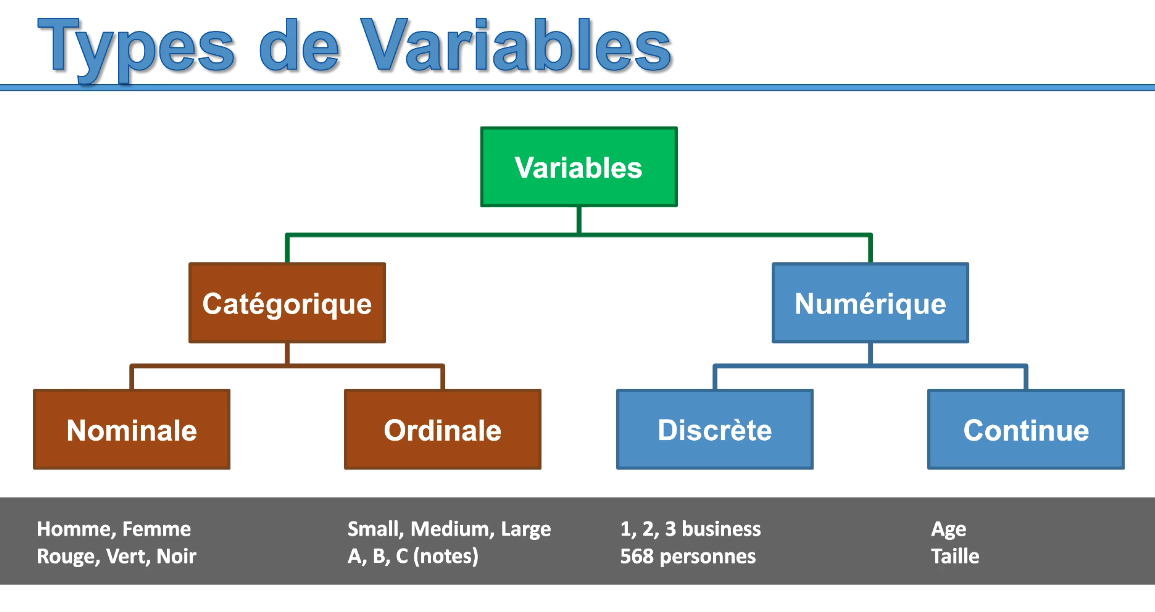

In [69]:
from IPython.display import Image
Image(filename='Variables.png')


# Categorical features

Transforming categorical data is an essential step during data preprocessing. sklearn’s machine learning library require the input dataset to always have numeric values it does not support categorical data. 
It is necessary to convert categorical features to a numerical representation.
Before you start transforming your data, it is important to figure out if the feature you’re working on is ordinal (as opposed to nominal). An ordinal feature is best described as a feature with  ordered categories.
Once you know what type of categorical data you’re working on, you can pick a suiting transformation tool. In sklearn that will be a OrdinalEncoder or LabelEncoder for ordinal data, and a OneHotEncoder for nominal data.
Let’s consider a simple example to demonstrate how both classes are working. Create a dataframe with four entries and three features: sex, blood type and education level.

In [70]:
import pandas as pd
import numpy as np

In [71]:
X = pd.DataFrame(
    np.array(['M', 'O-', 'medium',
             'M', 'O-', 'high',
              'F', 'O+', 'high',
              'F', 'AB', 'low']
            )
              .reshape((4,3)))
X.columns = ['sex', 'blood_type', 'edu_level']

In [72]:
X1=X
X1

,sex,blood_type,edu_level
0,M,O-,medium
1,M,O-,high
2,F,O+,high
3,F,AB,low


### Ordinal Feature (Dependent Feature)

Looking at the dataframe, you should notice education level is the only ordinal feature (it can be ordered and the distance between the categories is not known). We’ll start with encoding this feature with the OrdinalEncoder class. Import the class and create a new instance. Then update the education level feature by fitting and transforming the feature to the encoder. The result should look as below.

In [73]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X1.edu_level = encoder.fit_transform(X1.edu_level.values.reshape(-1, 1))


In [74]:
X1

,sex,blood_type,edu_level
0,M,O-,2.0
1,M,O-,0.0
2,F,O+,0.0
3,F,AB,1.0


Notice that we have a rather annoying issue here: our missing value is encoded as a separate class (3.0). Looking thoroughly at the documentation reveals that there is no solution for this issue yet. A good sign is that the sklearn developers are discussing the possibilities of implementing a suiting solution.
Another problem is that the order of our data is not respected. This can luckily be solved by passing an ordered list of unique values for the feature to the categories parameter.

In [75]:

X = pd.DataFrame(
    np.array(['M', 'O-', 'medium',
             'M', 'O-', 'high',
              'F', 'O+', 'high',
              'F', 'AB', 'low']
            )
              .reshape((4,3)))


X.columns = ['sex', 'blood_type', 'edu_level']


In [76]:
encoder = OrdinalEncoder(categories=[[ 'low', 'medium', 'high']])


In [77]:
X.edu_level = encoder.fit_transform(X.edu_level.values.reshape(-1, 1))
X


,sex,blood_type,edu_level
0,M,O-,1.0
1,M,O-,2.0
2,F,O+,2.0
3,F,AB,0.0


#### OrdinalEncoder vs LabelEncoder

OrdinalEncoder is for 2D data with the shape (n_samples, n_features)

LabelEncoder is for 1D data with the shape (n_samples,))

### Nominal Features (Independent Feature)


The most popular way to encode nominal features is one-hot-encoding. Essentially, each categorical feature with n categories is transformed into n binary features.



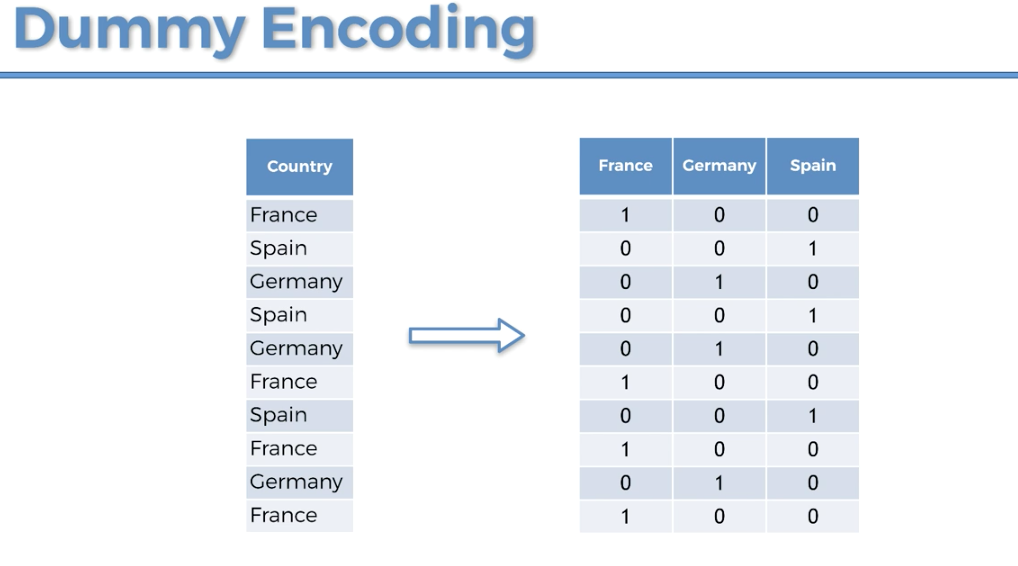

In [78]:
from IPython.display import Image
Image(filename='Dummy_Encoding.png')


Start with importing the OneHotEncoder class and creating a new instance with the output data type set to integer

In [79]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=np.int, sparse=True)

Then, fit and transform our two nominal categoricals. The output of this transformation will be a sparse matrix, which we will transform the matrix to an array (.toarray()) before we can pour it into a dataframe. Assign column names and the output is ready to be added to the other data (edu_level feature).

In [80]:

nominals = pd.DataFrame(
    onehot.fit_transform(X[['sex', 'blood_type']])\
    .toarray(),
    columns=['F', 'M', 'AB','O+', 'O-'])
nominals['edu_level'] = X.edu_level

Compare the output (nominals) to our original data to make sure everything came through the right way.

In [81]:
nominals 

,F,M,AB,O+,O-,edu_level
0,0,1,0,0,1,1.0
1,0,1,0,0,1,2.0
2,1,0,0,1,0,2.0
3,1,0,1,0,0,0.0


In [82]:
X

,sex,blood_type,edu_level
0,M,O-,1.0
1,M,O-,2.0
2,F,O+,2.0
3,F,AB,0.0


# Feature scaling

Feature scaling is a very important step in the preprocessing pipeline. 

Before applying any scaling operation it is very important to split your data into a train set and a test set. If you start scaling before, your training (and test) data might end up scaled around a mean value (see below) that is not actually the mean of the train or test data, and go past the whole reason why you're scaling in the first place.



Standardization is a transformation that centers the data by removing the mean value of each feature and then scale it by dividing (non-constant) features by their standard deviation. After standardizing data the mean will be zero and the standard deviation one.
Standardization can drastically improve the performance of models. For instance, many learning algorithms (such as Support Vector Machines) assume that all features are centered around zero and have variance in the same order. 
Depending on your needs and data, sklearn provides a bunch of scalers: StandardScaler, MinMaxScaler, MaxAbsScaler and RobustScaler.

### Standardization (Standard Scaler)


Sklearn its main scaler, the StandardScaler, uses a strict definition of standardization to standardize data. It purely centers the data by using the following formula, 

# x_scaled = (x - u) / s

## where u is the mean and s is the standard deviation.

Let’s take a look at our example to see this in practice.
Import the StandardScaler class and create a new instance. Then, fit and transform the scaler to feature 3.

In [83]:
Y = pd.DataFrame(
    np.array([5,7,8, np.NaN, np.NaN, np.NaN, -5,
              0,25,999,1,-1, np.NaN, 0, np.NaN])\
              .reshape((5,3)))
Y.columns = ['f1', 'f2', 'f3'] #feature1, feature 2, feature 3


In [84]:
Y

,f1,f2,f3
0,5.0,7.0,8.0
1,NaN,NaN,NaN
2,-5.0,0.0,25.0
3,999.0,1.0,-1.0
4,NaN,0.0,NaN


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(Y.f3.values.reshape(-1, 1))


array([[-0.24735697],
       [        nan],
       [ 1.32954369],
       [-1.08218672],
       [        nan]])

# Normalization (MinMaxScaler)

The MinMaxScaler transforms features by scaling each feature to a given range. This range can be set by specifying the feature_range parameter (default at (0,1)). This scaler works better for cases where the distribution is not Gaussian or the standard deviation is very small. However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider another scaler.

# x_scaled = (x-min(x)) / (max(x)–min(x))

Here we scale feature 3 (f3) to a scale between -3 and 3. As expected our maximum value (25) is transformed to 3 and our minimum value (-1) is transformed to -3. All the other values are linearly scaled between these values.

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))
scaler.fit_transform(Y.f3.values.reshape(-1, 1))

array([[-0.92307692],
       [        nan],
       [ 3.        ],
       [-3.        ],
       [        nan]])